<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/Random_Forest_Dhruv/applying_ML_algorithms/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.feature import hog
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


Loading CNN dataset


In [2]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN.drop('Unnamed: 0', axis=1, inplace=True)
#dropping those labels whose number of datapoints are less than 80
# Get the counts of each label
label_counts = df_CNN['2048'].value_counts()

# Filter out labels with counts less than 80
labels_to_keep = label_counts[label_counts >= 80].index

# Filter the DataFrame
df_CNN = df_CNN[df_CNN['2048'].isin(labels_to_keep)]


df_CNN

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
207,0.334396,1.031447,0.751403,0.061664,1.358539,0.131194,2.189165,0.168872,0.077561,0.128026,...,0.238129,0.033446,0.691363,1.453779,0.023197,1.180975,0.147620,0.132144,0.061259,Donald_Rumsfeld
208,0.052159,1.385429,0.948584,0.242452,0.765526,0.205163,2.773744,0.487321,0.375770,0.297134,...,0.151970,0.030394,0.931749,1.507545,0.074761,1.410434,0.187171,0.037343,0.192220,Donald_Rumsfeld
209,0.215924,1.243201,1.040831,0.082872,0.996569,0.093324,3.699462,0.166822,0.085976,0.420676,...,0.280522,0.046874,0.933633,1.932075,0.076832,1.779623,0.345520,0.009288,0.176782,Donald_Rumsfeld
210,0.273529,1.568788,1.131568,0.069734,1.060217,0.003534,3.313872,0.470634,0.280771,0.550614,...,0.392776,0.303419,0.718607,1.815761,0.034294,1.519493,0.046060,0.031623,0.141197,Donald_Rumsfeld
211,0.209844,1.102461,0.380182,0.109593,0.713786,0.054662,2.087155,0.206262,0.103134,0.152454,...,0.100046,0.225041,0.373597,0.834548,0.102522,0.784862,0.023190,0.141059,0.058093,Donald_Rumsfeld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,0.312240,1.009504,0.836836,0.018082,0.645396,0.066804,2.271123,0.094211,0.141208,0.130362,...,0.292594,0.216060,0.466659,0.785201,0.021710,0.663016,0.343248,0.060820,0.134825,Colin_Powell
3960,0.318314,1.077076,0.959523,0.018094,0.547238,0.033101,2.574726,0.171667,0.403900,0.141492,...,0.184252,0.081133,0.731656,1.326214,0.040101,1.001839,0.011269,0.099451,0.093939,Colin_Powell
3961,0.344084,0.716365,1.162212,0.025244,1.336606,0.032508,3.778199,0.205079,0.106398,0.161860,...,0.078263,0.198066,0.789224,1.613293,0.019929,1.323015,0.041566,0.020037,0.051515,Colin_Powell
3962,0.349864,0.792629,0.792507,0.079453,1.206452,0.083974,2.950798,0.072012,0.180612,0.077492,...,0.130345,0.346125,0.530768,1.389377,0.117860,1.205199,0.044289,0.032452,0.238427,Colin_Powell


In [3]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

print(f"Dataset size: {df_CNN.shape}")
print(f"Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=min(500, len(set(y_train_CNN)) - 1))
lda.fit_transform(X_train_CNN, y_train_CNN)

X_train_CNN = lda.transform(X_train_CNN)
X_test_CNN = lda.transform(X_test_CNN)
print(f"After applying LDA => Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")


Dataset size: (1140, 2049)
Training size: (912, 2048), Testing size: (228, 2048)
After applying LDA => Training size: (912, 4), Testing size: (228, 4)


Loading LBP dataset


In [4]:
url_filtered_LBP_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_LBP_features_dataset.csv' #for CNN limited
df_LBP = pd.read_csv(url_filtered_LBP_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_LBP.drop('Unnamed: 0', axis=1, inplace=True)
#dropping those labels whose number of datapoints are less than 80
# Get the counts of each label
label_counts = df_LBP['256'].value_counts()

# Filter out labels with counts less than 80
labels_to_keep = label_counts[label_counts >= 80].index

# Filter the DataFrame
df_LBP = df_LBP[df_LBP['256'].isin(labels_to_keep)]

df_LBP

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
199,747.0,72.0,433.0,185.0,61.0,6.0,224.0,354.0,392.0,30.0,...,498.0,3001.0,734.0,36.0,578.0,616.0,546.0,453.0,12702.0,George_W_Bush
200,516.0,33.0,438.0,186.0,34.0,2.0,172.0,316.0,243.0,23.0,...,341.0,2309.0,466.0,24.0,354.0,500.0,426.0,516.0,17530.0,George_W_Bush
201,805.0,76.0,366.0,204.0,68.0,10.0,181.0,307.0,537.0,54.0,...,529.0,2171.0,559.0,37.0,413.0,581.0,438.0,537.0,22703.0,George_W_Bush
202,572.0,42.0,304.0,219.0,37.0,3.0,247.0,736.0,587.0,22.0,...,624.0,3621.0,582.0,28.0,273.0,590.0,465.0,315.0,3466.0,George_W_Bush
203,577.0,49.0,403.0,268.0,87.0,4.0,334.0,641.0,494.0,34.0,...,564.0,1535.0,548.0,21.0,284.0,500.0,448.0,280.0,4402.0,George_W_Bush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,510.0,57.0,358.0,277.0,61.0,2.0,276.0,473.0,325.0,25.0,...,477.0,2048.0,667.0,27.0,395.0,615.0,504.0,392.0,6207.0,Tony_Blair
3335,680.0,57.0,496.0,208.0,69.0,9.0,200.0,365.0,332.0,26.0,...,430.0,2359.0,540.0,37.0,465.0,703.0,660.0,706.0,13144.0,Tony_Blair
3336,800.0,69.0,321.0,224.0,57.0,6.0,225.0,362.0,406.0,48.0,...,488.0,2234.0,723.0,28.0,590.0,850.0,458.0,677.0,13253.0,Tony_Blair
3337,351.0,25.0,197.0,141.0,27.0,4.0,142.0,455.0,247.0,13.0,...,347.0,5927.0,710.0,18.0,413.0,631.0,311.0,399.0,11066.0,Tony_Blair


In [5]:
# Separate features and labels
X = df_LBP.iloc[:, :-1]
y = df_LBP.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_LBP, X_test_LBP, y_train_LBP, y_test_LBP = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_LBP = scaler.fit_transform(X_train_LBP)
X_test_LBP = scaler.transform(X_test_LBP)

print(f"Dataset size: {df_LBP.shape}")
print(f"Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")
# Apply LDA with at most (number of classes - 1) components
lda = LDA(n_components=min(500, len(set(y_train_CNN)) - 1))
lda.fit_transform(X_train_LBP, y_train_LBP)

X_train_LBP = lda.transform(X_train_LBP)
X_test_LBP = lda.transform(X_test_LBP)

print(f"After applying LDA => Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")

Dataset size: (1140, 257)
Training size: (912, 256), Testing size: (228, 256)
After applying LDA => Training size: (912, 4), Testing size: (228, 4)


Random forest


In [11]:
import numpy as np
from collections import Counter
import random

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, n_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.root = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.n_features = self.n_features or X.shape[1]
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(set(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)

        best_feat, best_thresh = self._best_split(X, y, feat_idxs)

        if best_feat is None:
            return self.Node(value=self._most_common_label(y))

        left_idxs = X[:, best_feat] < best_thresh
        right_idxs = ~left_idxs

        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return self.Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            thresholds = np.unique(X[:, feat_idx])
            threshold_mean = np.mean(X[:,feat_idx])
            for thresh in thresholds:
              gain = self._information_gain(y, X[:, feat_idx], thresh)

              if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold_mean

        return split_idx, split_thresh

    def _information_gain(self, y, feature_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs = feature_column < threshold
        right_idxs = ~left_idxs

        if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(y[left_idxs]), len(y[right_idxs])
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        return parent_entropy - child_entropy

    def _entropy(self, y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probs if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] < node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_estimators=10, max_depth=10, min_samples_split=2, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def _get_n_features(self, n_total_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_total_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_total_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        return n_total_features

    def fit(self, X, y):
        self.trees = []
        n_features = self._get_n_features(X.shape[1])

        for _ in range(self.n_estimators):
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=n_features
            )
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)

        y_pred = [Counter(tree_pred).most_common(1)[0][0] for tree_pred in tree_preds]
        return np.array(y_pred)


RUNNING FOR CNN DATA

In [12]:
# Varying n_estimators and plotting accuracy
n_estimators_range = [3,5,8,10, 50, 100,150, 200]
train_accuracies = []
test_accuracies = []
for n in n_estimators_range:
    rf = RandomForest(n_estimators=n)
    rf.fit(X_train_CNN, y_train_CNN)

    train_acc = accuracy_score(y_train_CNN, rf.predict(X_train_CNN))
    test_acc = accuracy_score(y_test_CNN, rf.predict(X_test_CNN))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f'n_estimators={n}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

n_estimators=3, Train Accuracy: 0.9978, Test Accuracy: 0.7719
n_estimators=5, Train Accuracy: 0.9989, Test Accuracy: 0.7544
n_estimators=8, Train Accuracy: 1.0000, Test Accuracy: 0.7939
n_estimators=10, Train Accuracy: 1.0000, Test Accuracy: 0.7588
n_estimators=50, Train Accuracy: 1.0000, Test Accuracy: 0.7851
n_estimators=100, Train Accuracy: 1.0000, Test Accuracy: 0.8026
n_estimators=150, Train Accuracy: 1.0000, Test Accuracy: 0.7982
n_estimators=200, Train Accuracy: 1.0000, Test Accuracy: 0.7895


CNN PLOT

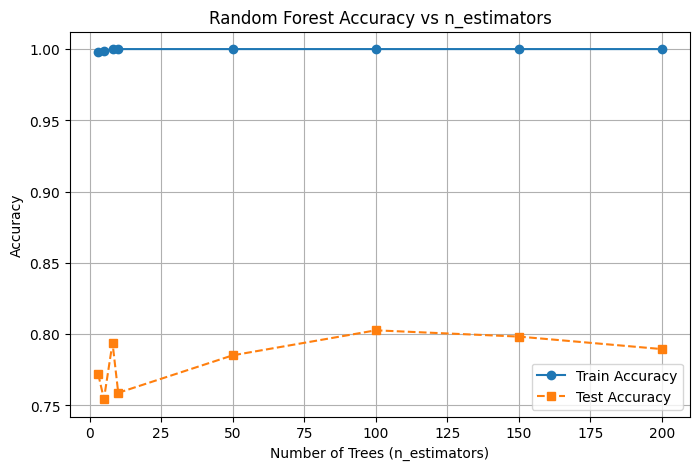

In [13]:
# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_range, test_accuracies, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

RUNNING FOR LBP DATA

In [14]:
# Varying n_estimators and plotting accuracy
n_estimators_range = [3,5,8,10, 50, 100,150, 200]
train_accuracies_lbp = []
test_accuracies_lbp = []
for n in n_estimators_range:
    rf = RandomForest(n_estimators=n)
    rf.fit(X_train_LBP, y_train_LBP)

    train_acc = accuracy_score(y_train_LBP, rf.predict(X_train_LBP))
    test_acc = accuracy_score(y_test_LBP, rf.predict(X_test_LBP))

    train_accuracies_lbp.append(train_acc)
    test_accuracies_lbp.append(test_acc)

    print(f'n_estimators={n}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

n_estimators=3, Train Accuracy: 0.9309, Test Accuracy: 0.4386
n_estimators=5, Train Accuracy: 0.9594, Test Accuracy: 0.4781
n_estimators=8, Train Accuracy: 0.9770, Test Accuracy: 0.4474
n_estimators=10, Train Accuracy: 0.9836, Test Accuracy: 0.4474
n_estimators=50, Train Accuracy: 1.0000, Test Accuracy: 0.4868
n_estimators=100, Train Accuracy: 0.9989, Test Accuracy: 0.4956
n_estimators=150, Train Accuracy: 1.0000, Test Accuracy: 0.4868
n_estimators=200, Train Accuracy: 1.0000, Test Accuracy: 0.5044


LBP PLOT

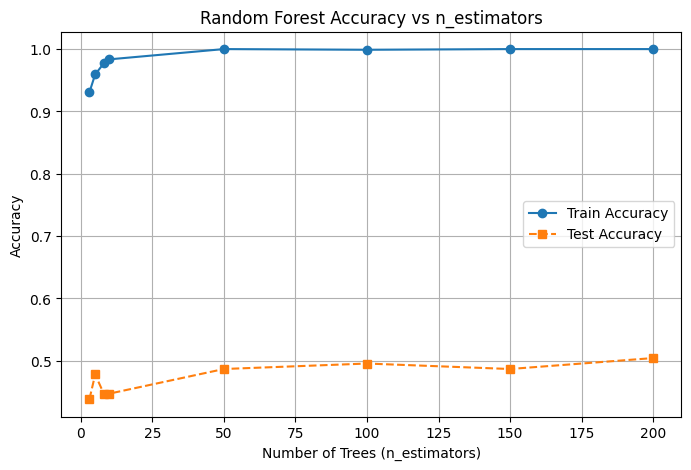

In [15]:
# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies_lbp, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_range, test_accuracies_lbp, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

 for lbp and cnn features the best accuracy comes with n = 100

depth=5, Train Accuracy: 0.9879, Test Accuracy: 0.7544
depth=10, Train Accuracy: 1.0000, Test Accuracy: 0.8026
depth=20, Train Accuracy: 1.0000, Test Accuracy: 0.7939
depth=50, Train Accuracy: 1.0000, Test Accuracy: 0.7851
depth=100, Train Accuracy: 1.0000, Test Accuracy: 0.7807


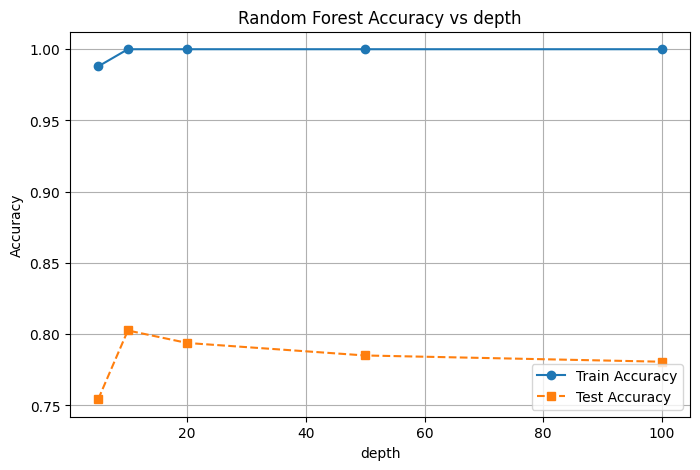

In [18]:
n_best = 100
depth_range = [5,10,20,50,100]
train_acc_depth_cnn = []
test_acc_depth_cnn = []
for depth in depth_range:
    rf = RandomForest(n_estimators=n_best,max_depth=depth)
    rf.fit(X_train_CNN, y_train_CNN)

    train_acc = accuracy_score(y_train_CNN, rf.predict(X_train_CNN))
    test_acc = accuracy_score(y_test_CNN, rf.predict(X_test_CNN))

    train_acc_depth_cnn.append(train_acc)
    test_acc_depth_cnn.append(test_acc)

    print(f'depth={depth}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')



plt.figure(figsize=(8, 5))
plt.plot(depth_range, train_acc_depth_cnn, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(depth_range, test_acc_depth_cnn, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs depth')
plt.legend()
plt.grid(True)
plt.show()